## Kaggle Competition(Ghouls, Goblins, and Ghosts... Boo!)
#### Can you classify monsters haunting Kaggle?

#### Details of the competition can be found [here.](https://www.kaggle.com/c/ghouls-goblins-and-ghosts-boo)

In [176]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [214]:
# Required for encoding categorical data
from sklearn.preprocessing import LabelEncoder

# For scaling data
from sklearn.preprocessing import StandardScaler

# For k-fold cross-validation
from sklearn.model_selection import cross_val_score

# For calculating accuracies on different combinations of parameters
from sklearn.model_selection import GridSearchCV

In [178]:
# Importing libraries required for classification models used in this notebook

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

### Data Preprocessing and Visualization

In [179]:
# Reading training data
df = pd.read_csv('train.csv')

df.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [180]:
# Deleting id column as it is not required for training purpose
df.drop('id', axis = 1, inplace = True)

[]

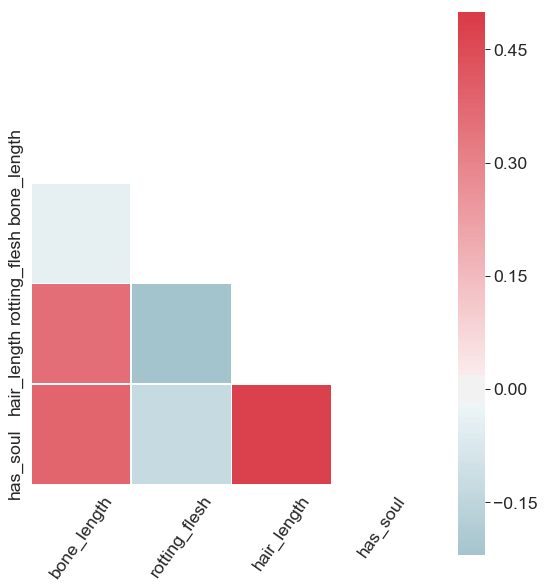

In [185]:
# Plotting heatmap for visualizing correlation between different columns

sns.set_style('white')
sns.set_context("paper",font_scale=2)
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(9,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.5, center=0,
           square=True, linewidths=0.5)
g.set_xticklabels(labels = df.columns,rotation=55)
g.plot()

In [186]:
# Correlation between different columns
df.corr()

,bone_length,rotting_flesh,hair_length,has_soul
bone_length,1.000000,-0.041716,0.353881,0.381675
rotting_flesh,-0.041716,1.000000,-0.220353,-0.132051
hair_length,0.353881,-0.220353,1.000000,0.474835
has_soul,0.381675,-0.132051,0.474835,1.000000


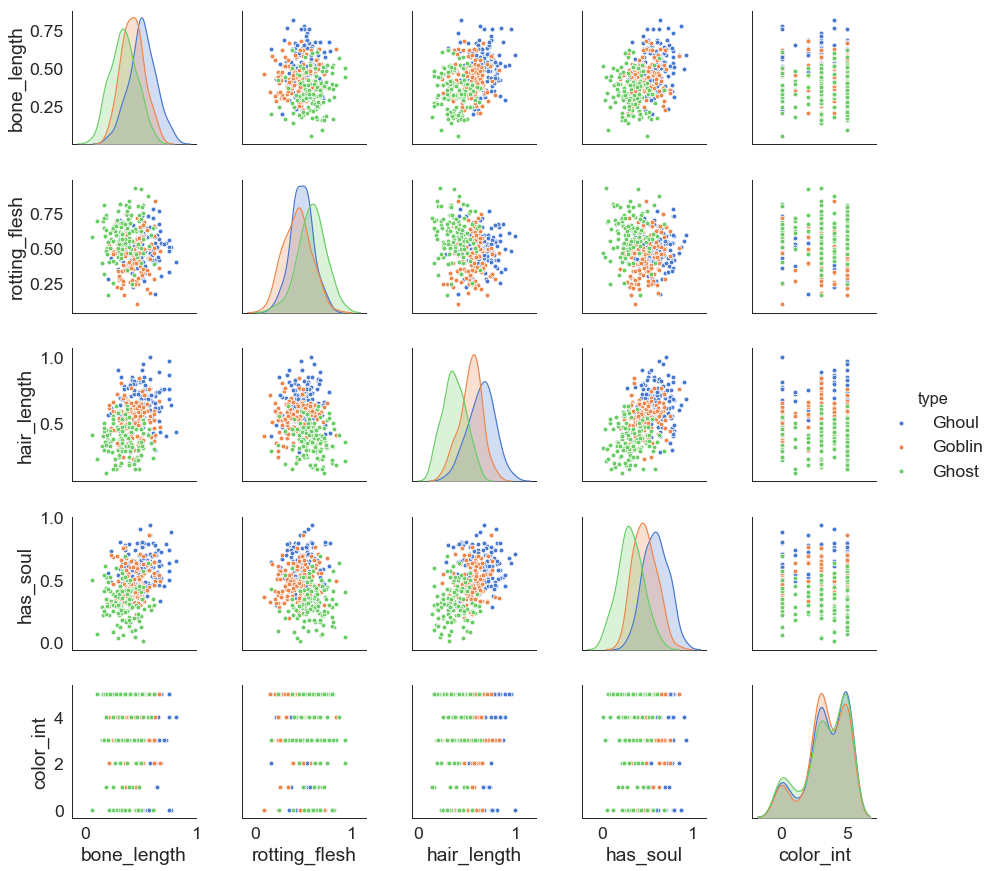

In [187]:
# Some more analysis using some visualizations

# Use LabelEncoder for the 'color' feature
color_le = LabelEncoder()
color_le.fit(df['color'])
df['color_int'] = color_le.transform(df['color'])

_ = sns.pairplot(df.drop('color', axis = 1), hue = 'type', palette = 'muted', diag_kind='kde')

df.drop('color_int', axis = 1, inplace = True)

In [188]:
# Splitting features and labels into different dataframes

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [191]:
# Printing total number of missing values in features and labels

print(X.isnull().sum().sum())
print(y.isnull().sum().sum())

0
0


In [189]:
# Printing all the categorical values present in columns 'color' and 'type'

print(df.color.unique())
print(df.type.unique())

['clear' 'green' 'black' 'white' 'blue' 'blood']
['Ghoul' 'Goblin' 'Ghost']


In [190]:
# Converting categorical values into dummy variables and droping first dummy variable column to avoid dummy variable trap
X = pd.get_dummies(X, drop_first = True)

X.head()

,bone_length,rotting_flesh,hair_length,has_soul,color_blood,color_blue,color_clear,color_green,color_white
0,0.354512,0.350839,0.465761,0.781142,0,0,1,0,0
1,0.575560,0.425868,0.531401,0.439899,0,0,0,1,0
2,0.467875,0.354330,0.811616,0.791225,0,0,0,0,0
3,0.776652,0.508723,0.636766,0.884464,0,0,0,0,0
4,0.566117,0.875862,0.418594,0.636438,0,0,0,1,0


In [193]:
# Printing Variances of different columns

X[X.columns[X.dtypes == 'float']].var()

bone_length      0.017645
rotting_flesh    0.021421
hair_length      0.028867
has_soul         0.031022
dtype: float64

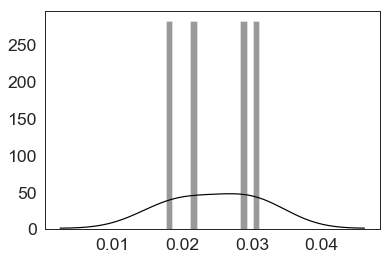

In [192]:
# Plotting variances of different columns

sns.distplot(X[X.columns[X.dtypes == 'float']].var(),color = 'black', bins = 15)

In [195]:
# Scaling features using sklearn StandardScaler
sc = StandardScaler()
X.iloc[:,:4] = sc.fit_transform(X.iloc[:,:4])

X.head()

,bone_length,rotting_flesh,hair_length,has_soul,color_blood,color_blue,color_clear,color_green,color_white
0,-0.600418,-1.067386,-0.373386,1.761024,0,0,1,0,0
1,1.065931,-0.554049,0.013479,-0.179048,0,0,0,1,0
2,0.254162,-1.043498,1.664981,1.818350,0,0,0,0,0
3,2.581850,0.012822,0.634464,2.348442,0,0,0,0,0
4,0.994744,2.524715,-0.651376,0.938337,0,0,0,1,0


In [196]:
# Printing variance and mean after feature scaling
print(X.iloc[:,:4].var(),'\n')
print(X.iloc[:,:4].mean())

bone_length      1.002703
rotting_flesh    1.002703
hair_length      1.002703
has_soul         1.002703
dtype: float64 

bone_length     -1.795509e-17
rotting_flesh    2.483787e-16
hair_length     -2.687278e-16
has_soul         3.357602e-16
dtype: float64


### Applying Different Models

In [197]:
# Creating dictionary to store accuracy results of different models

scores = {}

maximum acc_  0.714139454523


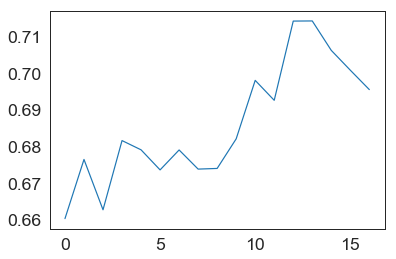

In [198]:
# Using KNearestNeighbors Classifier

# Creating list to append all the accuracies obtained with different values of 'n_neighbors' parameter
acc_f = []

for i in range(3,20):
    clc1 = KNeighborsClassifier(n_neighbors = i)

    acc = (cross_val_score(estimator = clc1, X = X, y = y, cv = 5))
    acc_f.append(acc.mean())

scores['knn'] = max(acc_f)

print('maximum acc_ ',max(acc_f))

# Plotting different accuracy results against values of 'n_neighbors'
plt.plot(acc_f)

In [199]:
# Using Decision Tree Classifier

clc2 = DecisionTreeClassifier(random_state = 42)

acc = (cross_val_score(estimator = clc2, X = X, y = y, cv = 5))
acc.mean()

scores['DecisionTree'] = acc.mean()
print('acc_ ',acc.mean())  

acc_  0.611825249907


maximum acc_  0.70887918055


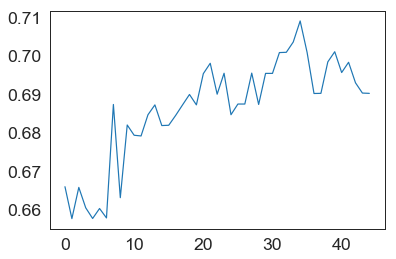

In [200]:
# Using Random Forest Classifier

# Creating list to append all the accuracies obtained with different values of 'n_estimators' parameter
acc_f = []
for i in range(5,50):
    clc3 = RandomForestClassifier(n_estimators = i, random_state= 42)

    acc = (cross_val_score(estimator = clc3, X = X, y = y, cv = 5))
    acc_f.append(acc.mean())

scores['RandomForest'] = max(acc_f)
print('maximum acc_ ',max(acc_f))  

# Plotting different accuracy results against values of 'n_neighbors'
plt.plot(acc_f)

In [201]:
# Using SVM Classifier

# Creating list to append all the accuracies obtained with different values of 'n_estimators' parameter
acc_f = []

# Using linear kernel SVC
clc4a = SVC(kernel = 'linear')

acc = cross_val_score(estimator = clc4a, X = X, y = y, cv = 5)
acc_f.append(acc.mean())
print('Accuracy with Linear kernel: ',acc.mean())


# Using rbf kernel SVC
clc4b = SVC(kernel = 'rbf')

acc = cross_val_score(estimator = clc4b, X = X, y = y, cv = 5)
acc_f.append(acc.mean())
print('Accuracy with rbf kernel: ',acc.mean())

scores['SVM'] = max(acc_f)

Accuracy with Linear kernel:  0.730502776749
Accuracy with rbf kernel:  0.735837097371


In [202]:
# Using XGBoost

clc5 = XGBClassifier()
acc = cross_val_score(estimator = clc5, X = X, y = y, cv = 5)
clc5.fit(X, y)

print('acc_ ',acc.mean())
scores['XGBoost'] = acc.mean()

acc_  0.711545847217


In [203]:
# Printing accuracies obtained from different models
scores

{'DecisionTree': 0.61182524990744169,
 'RandomForest': 0.70887918055041343,
 'SVM': 0.73583709737134384,
 'XGBoost': 0.71154584721708014,
 'knn': 0.71413945452301608}

### SVM has the most accuracy on this dataset followed by KNN and XGBoost.

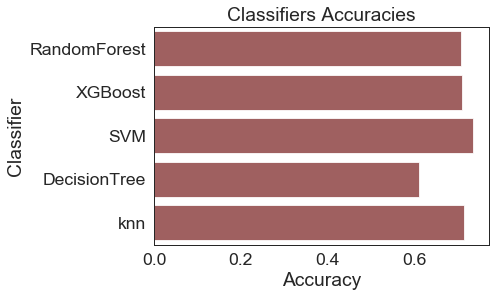

In [213]:
# plotting best accuracies of different models used on a barplot

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

for clf in scores:
    log_entry = pd.DataFrame([[clf, scores[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.title('Classifiers Accuracies')

sns.barplot(x='Accuracy', y='Classifier', data=log, color="red", saturation = 0.25)

## Tuning parameters of the top three models, i.e., KNN, SVM and XGBoost.

In [88]:
# SVM Parameter Tuning_

classifier1 = SVC()
parameters = [{'C': [1,5,10,50,100], 'kernel': ['linear']},
              {'C': [1,5,10,50,100], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
              {'C': [1,5,10,50,100], 'kernel': ['sigmoid'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
             ]

grid_search = GridSearchCV(estimator = classifier1, param_grid = parameters, scoring = 'accuracy', cv = 5, n_jobs = -1, verbose = 2)
grid_search = grid_search.fit(X, y)

best_acc = grid_search.best_score_
best_param = grid_search.best_params_

Fitting 5 folds for each of 105 candidates, totalling 525 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 525 out of 525 | elapsed:    8.0s finished


In [215]:
# Printing Best accuracy and best parameters

print(best_acc)
print(best_param)

0.714285714286
{'algorithm': 'auto', 'n_neighbors': 15}


In [216]:
# Importing test dataset

df1 = pd.read_csv('test.csv')
df1.drop('id', axis = 1, inplace = True)
df1.head()

,bone_length,rotting_flesh,hair_length,has_soul,color
0,0.471774,0.387937,0.706087,0.698537,black
1,0.427332,0.645024,0.565558,0.451462,white
2,0.549602,0.491931,0.660387,0.449809,black
3,0.638095,0.682867,0.471409,0.356924,white
4,0.361762,0.583997,0.377256,0.276364,black


In [217]:
# Feature Scaling

sc = StandardScaler()
df1.iloc[:,:4] = sc.fit_transform(df1.iloc[:,:4])

In [218]:
# Converting categorical values to dummy variables
df1 = pd.get_dummies(df1, drop_first = True)
df1.columns = X.columns

df1.head()

,bone_length,rotting_flesh,hair_length,has_soul,color_blood,color_blue,color_clear,color_green,color_white
0,0.340570,-0.730419,1.100452,1.306161,0,0,0,0,0
1,0.013670,0.892584,0.281351,-0.070391,0,0,0,0,1
2,0.913039,-0.073901,0.834085,-0.079597,0,0,0,0,0
3,1.563961,1.131495,-0.267415,-0.597093,0,0,0,0,1
4,-0.468639,0.507322,-0.816203,-1.045926,0,0,0,0,0


In [219]:
# Predicting results using SVM best parameters
svc = SVC(gamma = 0.1, C = 5, kernel = 'sigmoid')
svc.fit(X, y)

pred = svc.predict(df1)

In [220]:
# Importing 'sample_submission.csv' file
df = pd.read_csv('sample_submission.csv')
df.head()

,id,type
0,3,Ghost
1,6,Ghost
2,9,Ghost
3,10,Ghost
4,13,Ghost


In [221]:
# Droping sample predictions
df.drop('type', axis = 1, inplace = True)

# Adding calculated predictions
df['type'] = pred

# Writing data to 'Submission3.csv'
df.to_csv('Submission3.csv', index = None)

## 'Submission3.csv' had 71.07% accuracy on kaggle

In [222]:
# XGBoost Parameter Tuning_

classifier2 = XGBClassifier()

parameters = [{'booster': ['gblinear'], 'objective': ['reg:linear', 'reg:logistic', 'binary:logistic'],'max_depth': range(3,10), 'gamma': range(6)},
              {'booster': ['gbtree'], 'objective': ['reg:linear', 'reg:logistic', 'binary:logistic'], 'max_depth': range(3,10), 'gamma': range(6)},
             ]

grid_search = GridSearchCV(estimator = classifier2, param_grid = parameters, scoring = 'accuracy', cv = 5, n_jobs = -1, verbose = 2)
grid_search = grid_search.fit(X, y)

best_acc = grid_search.best_score_
best_param = grid_search.best_params_

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 489 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 855 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 1138 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1260 out of 1260 | elapsed:  2.2min finished


In [223]:
# Printing Best accuracy and best parameters

print(best_acc)
print(best_param)

0.738544474394
{'booster': 'gbtree', 'gamma': 2, 'objective': 'reg:linear', 'max_depth': 6}


In [224]:
# Predicting results using XGBoost best parameters
xgb = XGBClassifier(gamma = 2, objective = 'reg:linear', max_depth = 6, booster = 'gbtree')
xgb.fit(X, y)

pred = xgb.predict(df1)

In [225]:
# Importing 'sample_submission.csv' file

df = pd.read_csv('sample_submission.csv')
df.head()

,id,type
0,3,Ghost
1,6,Ghost
2,9,Ghost
3,10,Ghost
4,13,Ghost


In [226]:
# Droping sample predictions
df.drop('type', axis = 1, inplace = True)

# Adding calculated predictions
df['type'] = pred

# Writing data to 'Submission2.csv'
df.to_csv('Submission2.csv', index = None)

## 'Submission2.csv' had 71.46% accuracy on kaggle

In [227]:
# KNN Parameter Tuning_

classifier3 = KNeighborsClassifier()

parameters = [{'n_neighbors': range(3,30), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}]

grid_search = GridSearchCV(estimator = classifier3, param_grid = parameters, scoring = 'accuracy', cv = 5, n_jobs = -1, verbose = 2)
grid_search = grid_search.fit(X, y)

best_acc = grid_search.best_score_
best_param = grid_search.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   13.1s finished


In [228]:
# Printing Best accuracy and best parameters

print(best_acc)
print(best_param)

0.714285714286
{'algorithm': 'auto', 'n_neighbors': 15}


In [229]:
# Predicting results using KNN best parameters
knn = KNeighborsClassifier(n_neighbors = 15, algorithm = 'auto')
knn.fit(X, y)

pred = knn.predict(df1)

In [230]:
# Importing 'sample_submission.csv' file

df = pd.read_csv('sample_submission.csv')
df.head()

,id,type
0,3,Ghost
1,6,Ghost
2,9,Ghost
3,10,Ghost
4,13,Ghost


In [231]:
# Droping sample predictions
df.drop('type', axis = 1, inplace = True)

# Adding calculated predictions
df['type'] = pred

# Writing data to 'Submission1.csv'
df.to_csv('Submission1.csv', index = None)

## 'Submission1.csv' had 72.59% accuracy on kaggle